In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import nltk 
from nltk import RegexpTokenizer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer


In [39]:
#load data and drop index columns
strains = pd.read_csv('processed strains data', index_col = 0 )
strains = strains.loc[:, ~strains.columns.str.contains('^Unnamed')]

#change values to percentages 
strains['sativa_comp'] = strains['sativa_comp']/100
strains['indica_comp'] = strains['indica_comp']/100
strains.head()

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc
0,S.A.G.E. (Sativa Afghani Genetic Equilibrium) ...,Hybrid,"['Energizing', ' Euphoria', ' Happy', ' Relaxi...","['ADD/ADHD', ' Anxiety', ' Chronic Pain', ' De...","['Earthy', ' Herbal', ' Sage', ' Spicy', ' Woo...","['Sage', ' Spicy']",4.8,S.A.G.E is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19
1,Cannatonic Marijuana Strain,Hybrid,"['Calming', ' Happy', ' Mellow', ' Relaxing', ...","['Anxiety', ' Chronic Pain', ' Cramps', ' Head...","['Citrus', ' Earthy', ' Herbal', ' Lemon', ' S...","['Citrus', ' Herbal', ' Sour', ' Spicy', ' Swe...",4.7,Cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07
2,Blue Dream Marijuana Strain,Sativa Dominant Hybrid,"['Creative', ' Energizing', ' Euphoria', ' Hap...","['ADD/ADHD', ' Anxiety', ' Autism', ' Bipolar ...","['Earthy', ' Fruity', ' Sweet', ' Vanilla']","['Berry', ' Blueberry', ' Fruity', ' Herbal', ...",4.5,Blue Dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17
3,Goji OG Marijuana Strain,Sativa Dominant Hybrid,"['Creative', ' Energizing', ' Euphoria', ' Hap...","['Chronic Pain', ' Depression', ' Gastrointest...","['Cherry', ' Pungent', ' Sweet']","['Berry', ' Cherry', ' Strawberry', ' Sweet', ...",4.5,"Named after the bright red Himalayan berry, th...",301.0,0.8,0.2,0.01,0.00,0.22
4,Green Love Potion Marijuana Strain,Indica Dominant Hybrid,"['Aroused', ' Happy', ' Relaxing', ' Sleepy']","['Anxiety', ' Chronic Pain', ' Cramps', ' Depr...","['Earthy', ' Floral', ' Lavender', ' Pungent',...","['Chemical', ' Herbal', ' Lavender', ' Menthol...",4.5,"Being an indica dominant hybrid strain, Green ...",60.0,0.8,0.2,0.00,0.00,0.11


In [40]:
#Final data values 8924 values with 16 attributes 
strains.shape

(8924, 14)

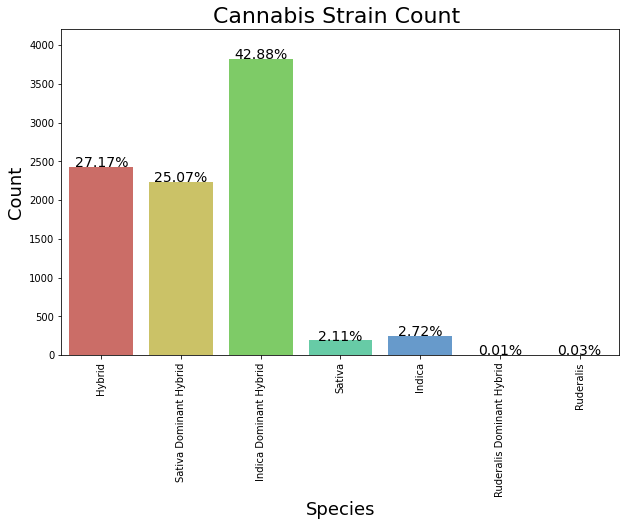

In [41]:
total = len(strains)
plt.figure(figsize=(10,6))

g = sns.countplot(x="strain_type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Cannabis Strain Count ", fontsize=22)
g.set_xlabel('Species', fontsize=18)
g.set_ylabel('Count', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)
plt.xticks(rotation = 90)

plt.show()


/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


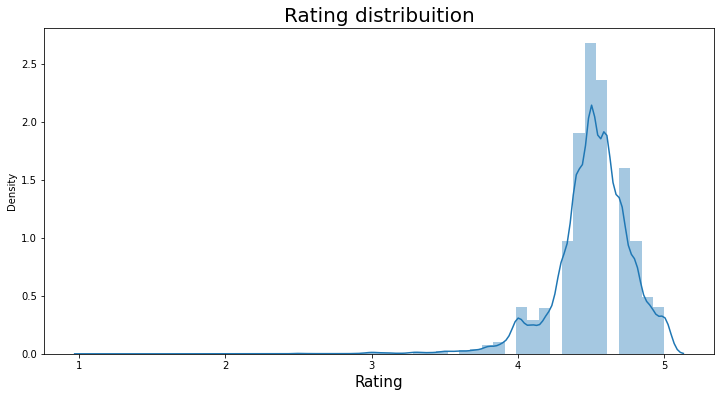

In [42]:
plt.figure(figsize=(12,6))

#Total rating distribuition
g = sns.distplot(strains["rating"],
                 bins=50)
g.set_title("Rating distribuition", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

In [43]:
print("Rating Distribuition by Species Type")
pd.crosstab(strains[strains.rating > 3.2]['rating'], strains.strain_type).T

Rating Distribuition by Species Type


rating,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
strain_type,,,,,,,,,,,,,,,,,,
Hybrid,5,2,9,9,6,12,26,95,56,72,164,378,510,420,295,179,93,87
Indica,1,0,0,0,1,3,4,13,5,17,14,29,46,32,25,18,20,12
Indica Dominant Hybrid,4,5,4,5,16,27,23,93,77,108,280,584,813,730,494,294,147,106
Ruderalis,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
Ruderalis Dominant Hybrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Sativa,0,0,1,1,0,2,2,8,7,5,21,28,35,36,14,17,5,6
Sativa Dominant Hybrid,2,1,5,5,3,11,18,69,58,72,198,306,460,423,287,170,75,70


/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

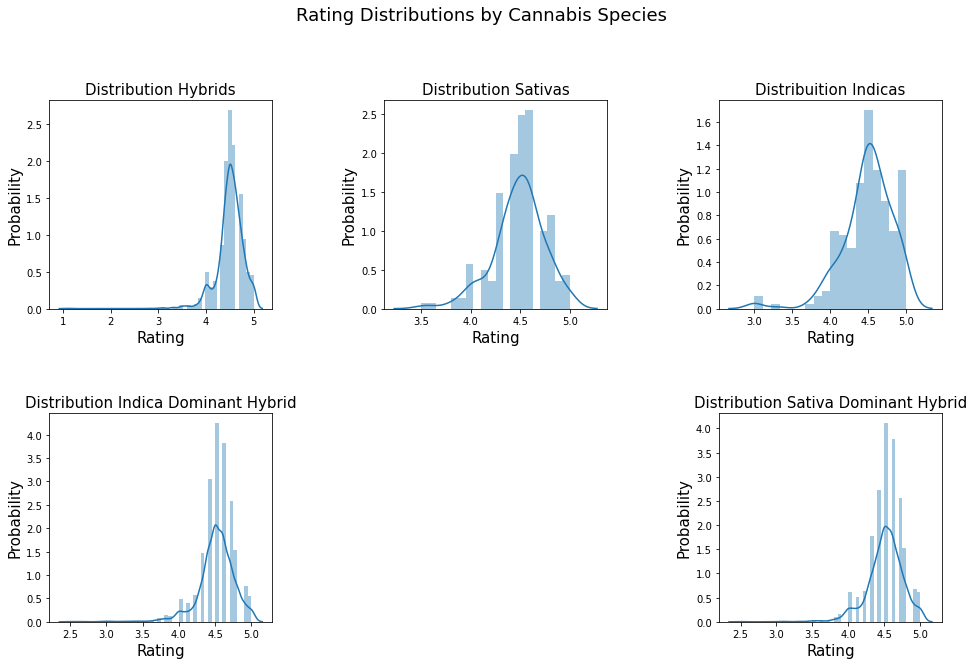

In [44]:
fig,ax = plt.subplots(3,2, figsize = (16,10))
#plt.figure(figsize=(16,10))

fig.suptitle('Rating Distributions by Cannabis Species', fontsize=18)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(strains[(strains.strain_type == 'Hybrid') & 
                               (strains.rating > 0)]["rating"])
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribution Hybrids", fontsize=15)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.strain_type == 'Sativa') & 
                               (strains.rating > 0)]["rating"])
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribution Sativas",
             fontsize=15)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.strain_type == 'Indica') & 
                               (strains.rating > 0)]["rating"])
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=15)


g4 = plt.subplot(234)
g4 = sns.distplot(strains[(strains.strain_type == 'Indica Dominant Hybrid') & (strains.rating > 0)]['rating'])
g4.set_xlabel("Rating", fontsize = 15)
g4.set_ylabel("Probability", fontsize = 15)
g4.set_title("Distribution Indica Dominant Hybrid", fontsize = 15)

g5 = plt.subplot(236)
g5 = sns.distplot(strains[(strains.strain_type == 'Sativa Dominant Hybrid') & (strains.rating > 0)]['rating'])
g5.set_xlabel("Rating", fontsize = 15)
g5.set_ylabel("Probability", fontsize = 15)
g5.set_title("Distribution Sativa Dominant Hybrid", fontsize = 15)


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.85)

plt.show()

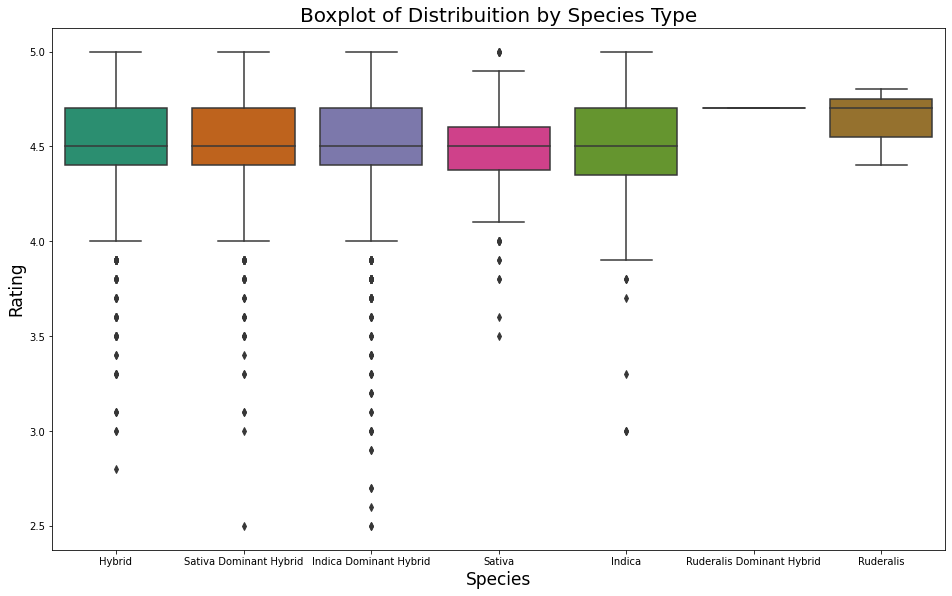

In [45]:
plt.figure(figsize=(16,10))

g3 = sns.boxplot(x="strain_type",y="rating",  palette='Dark2',
                data=strains[strains["rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show(g3)

/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/issy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

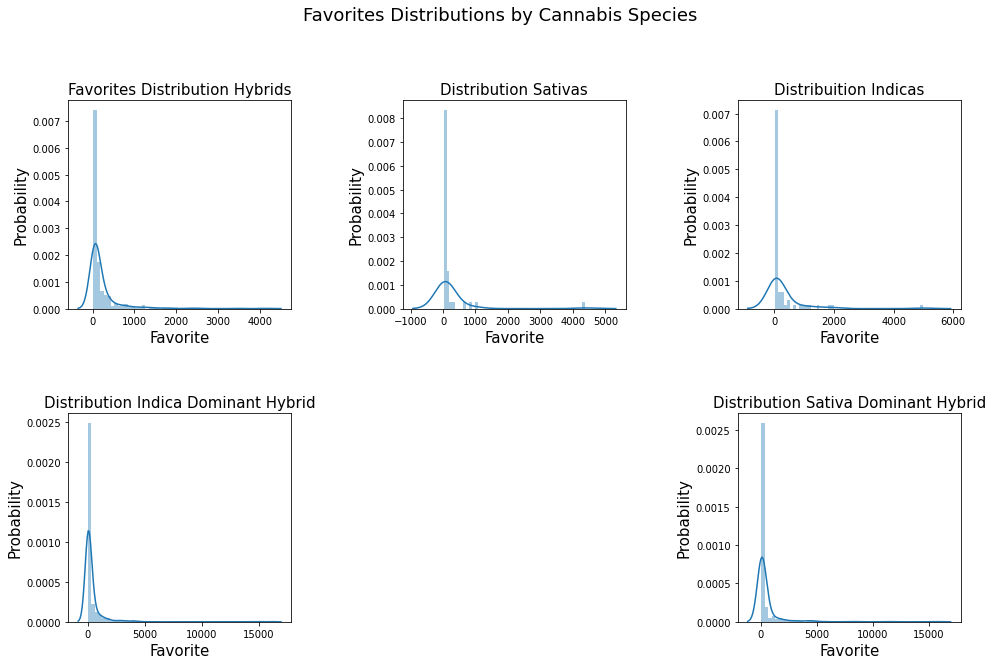

In [46]:
fig,ax = plt.subplots(3,2, figsize = (16,10))
#plt.figure(figsize=(16,10))

fig.suptitle('Favorites Distributions by Cannabis Species', fontsize=18)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.distplot(strains[(strains.strain_type == 'Hybrid') & 
                               (strains.fav_count > 20)]["fav_count"])
g.set_xlabel("Favorite", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Favorites Distribution Hybrids", fontsize=15)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.strain_type == 'Sativa') & 
                               (strains.fav_count> 20)]["fav_count"])
g1.set_xlabel("Favorite", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribution Sativas",
             fontsize=15)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.strain_type == 'Indica') & 
                               (strains.fav_count > 20)]["fav_count"])
g2.set_xlabel("Favorite", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=15)


g4 = plt.subplot(234)
g4 = sns.distplot(strains[(strains.strain_type == 'Indica Dominant Hybrid') & (strains.fav_count > 20)]['fav_count'])
g4.set_xlabel("Favorite", fontsize = 15)
g4.set_ylabel("Probability", fontsize = 15)
g4.set_title("Distribution Indica Dominant Hybrid", fontsize = 15)

g5 = plt.subplot(236)
g5 = sns.distplot(strains[(strains.strain_type == 'Sativa Dominant Hybrid') & (strains.fav_count > 20)]['fav_count'])
g5.set_xlabel("Favorite", fontsize = 15)
g5.set_ylabel("Probability", fontsize = 15)
g5.set_title("Distribution Sativa Dominant Hybrid", fontsize = 15)


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.85)

plt.show()

In [47]:
strains.head()

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc
0,S.A.G.E. (Sativa Afghani Genetic Equilibrium) ...,Hybrid,"['Energizing', ' Euphoria', ' Happy', ' Relaxi...","['ADD/ADHD', ' Anxiety', ' Chronic Pain', ' De...","['Earthy', ' Herbal', ' Sage', ' Spicy', ' Woo...","['Sage', ' Spicy']",4.8,S.A.G.E is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19
1,Cannatonic Marijuana Strain,Hybrid,"['Calming', ' Happy', ' Mellow', ' Relaxing', ...","['Anxiety', ' Chronic Pain', ' Cramps', ' Head...","['Citrus', ' Earthy', ' Herbal', ' Lemon', ' S...","['Citrus', ' Herbal', ' Sour', ' Spicy', ' Swe...",4.7,Cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07
2,Blue Dream Marijuana Strain,Sativa Dominant Hybrid,"['Creative', ' Energizing', ' Euphoria', ' Hap...","['ADD/ADHD', ' Anxiety', ' Autism', ' Bipolar ...","['Earthy', ' Fruity', ' Sweet', ' Vanilla']","['Berry', ' Blueberry', ' Fruity', ' Herbal', ...",4.5,Blue Dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17
3,Goji OG Marijuana Strain,Sativa Dominant Hybrid,"['Creative', ' Energizing', ' Euphoria', ' Hap...","['Chronic Pain', ' Depression', ' Gastrointest...","['Cherry', ' Pungent', ' Sweet']","['Berry', ' Cherry', ' Strawberry', ' Sweet', ...",4.5,"Named after the bright red Himalayan berry, th...",301.0,0.8,0.2,0.01,0.00,0.22
4,Green Love Potion Marijuana Strain,Indica Dominant Hybrid,"['Aroused', ' Happy', ' Relaxing', ' Sleepy']","['Anxiety', ' Chronic Pain', ' Cramps', ' Depr...","['Earthy', ' Floral', ' Lavender', ' Pungent',...","['Chemical', ' Herbal', ' Lavender', ' Menthol...",4.5,"Being an indica dominant hybrid strain, Green ...",60.0,0.8,0.2,0.00,0.00,0.11


In [48]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    list_ = list_.replace(' ', '')
    return list_

strains['effect'] = strains['effect'].apply(clean_alt_list)
#strains['may_relieve'] = strains['may_relieve'].apply(clean_alt_list)
#strains['aromas'] = strains['aromas'].apply(clean_alt_list)
#strains['flavors'] = strains['flavors'].apply(clean_alt_list)

In [49]:
strains['effect'] = strains['effect'].astype(str)
strains['effect'] = strains['effect'].apply(eval)
#strains['may_relieve'] = strains['may_relieve'].apply(eval)
#strains['aromas'] = strains['aromas'].apply(eval)
#strains['flavors'] = strains['flavors'].apply(eval)


/var/folders/fn/x89br4314ms41dw0v78yt6hc0000gn/T/ipykernel_28275/1975748436.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(unique_effects, rotation = 90)


[Text(0, 0, "'Uplifting'"),
 Text(1, 0, "'Relaxing'"),
 Text(2, 0, "'Happy'"),
 Text(3, 0, "'Euphoria'"),
 Text(4, 0, "'BodyHigh'"),
 Text(5, 0, "'Cerebral'"),
 Text(6, 0, "'Creative'"),
 Text(7, 0, "'Sleepy'"),
 Text(8, 0, "'Energizing'"),
 Text(9, 0, "'Calming'"),
 Text(10, 0, "'Hungry'"),
 Text(11, 0, "'Focus'"),
 Text(12, 0, "'Sociable'"),
 Text(13, 0, "'Giggly'"),
 Text(14, 0, "'Tingly'"),
 Text(15, 0, "'Aroused'"),
 Text(16, 0, "'Motivation'"),
 Text(17, 0, "'LongLasting'"),
 Text(18, 0, "'Mellow'"),
 Text(19, 0, "'NotYetListed'"),
 Text(20, 0, "'ImmediateEffect'"),
 Text(21, 0, "'Creeper'"),
 Text(22, 0, "'Energetic'"),
 Text(23, 0, "'Inflammation'"),
 Text(24, 0, "'Strong'"),
 Text(25, 0, "'Headaches'"),
 Text(26, 0, "'Migraines'"),
 Text(27, 0, "'Nausea'"),
 Text(28, 0, "'Relacing'"),
 Text(29, 0, "'Relaxed'"),
 Text(30, 0, "'BipolarDepression'"),
 Text(31, 0, "'PTSD'"),
 Text(32, 0, "'MoodSwings'")]

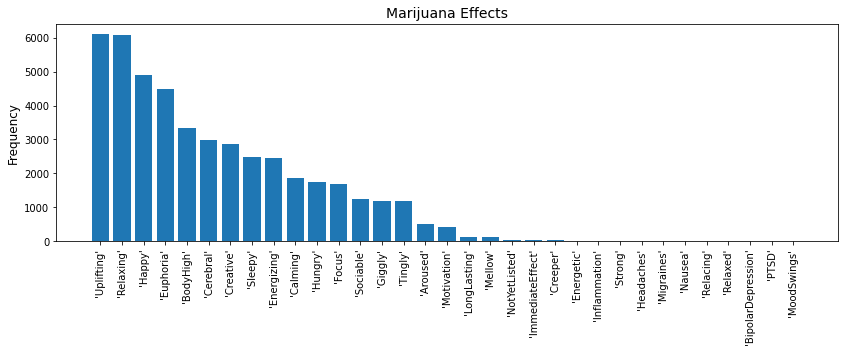

In [50]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])


# Get unique items & counts
unique_effects = to_1D(strains["effect"]).value_counts().index.tolist()
unique_effects_counts = to_1D(strains["effect"]).value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(unique_effects, unique_effects_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Marijuana Effects", size = 14)
ax.set_xticklabels(unique_effects, rotation = 90)

In [51]:
effects_expanded = strains['effect'].apply(pd.Series)
effects_expanded

,0,1,2,3,4,5,6,7,8
0,'Energizing','Euphoria','Happy','Relaxing',NaN,NaN,NaN,NaN,NaN
1,'Calming','Happy','Mellow','Relaxing','Uplifting',NaN,NaN,NaN,NaN
2,'Creative','Energizing','Euphoria','Happy',NaN,NaN,NaN,NaN,NaN
3,'Creative','Energizing','Euphoria','Happy','Uplifting',NaN,NaN,NaN,NaN
4,'Aroused','Happy','Relaxing','Sleepy',NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9284,'Euphoria','Happy','Hungry','Relaxing','Uplifting',NaN,NaN,NaN,NaN
9286,'Calming','Giggly','Relaxing','Sleepy','Sociable','Uplifting',NaN,NaN,NaN
9287,'BodyHigh','Calming','Euphoria','Relaxing','Uplifting',NaN,NaN,NaN,NaN
9288,'Happy','Relaxing','Uplifting',NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
effects_expanded.iloc[:,0].value_counts(normalize = True)

'BodyHigh'             0.360040
'Creative'             0.142985
'Cerebral'             0.141977
'Calming'              0.107239
'Euphoria'             0.075639
'Aroused'              0.057373
'Energizing'           0.046616
'Happy'                0.029135
'Relaxing'             0.011542
'Focus'                0.007284
'Giggly'               0.006723
'Hungry'               0.004034
'NotYetListed'         0.003362
'Sleepy'               0.001681
'Uplifting'            0.001233
'LongLasting'          0.001009
'Motivation'           0.000784
'Mellow'               0.000672
'Sociable'             0.000224
'Creeper'              0.000224
'Energetic'            0.000112
'BipolarDepression'    0.000112
Name: 0, dtype: float64

In [53]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)


fruits_bool = boolean_df(
  item_lists = strains["effect"],
  unique_items = unique_effects
)

In [54]:
fruits_bool

,'Uplifting','Relaxing','Happy','Euphoria','BodyHigh','Cerebral','Creative','Sleepy','Energizing','Calming',...,'Inflammation','Strong','Headaches','Migraines','Nausea','Relacing','Relaxed','BipolarDepression','PTSD','MoodSwings'
0,False,True,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9286,True,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9287,True,True,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9288,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
fruits_corr = fruits_bool.corr(method = 'pearson')
fruits_corr

,'Uplifting','Relaxing','Happy','Euphoria','BodyHigh','Cerebral','Creative','Sleepy','Energizing','Calming',...,'Inflammation','Strong','Headaches','Migraines','Nausea','Relacing','Relaxed','BipolarDepression','PTSD','MoodSwings'
'Uplifting',1.000000,0.024824,0.026927,-0.031186,-0.021073,0.076154,0.010535,-0.115337,0.090234,0.224961,...,0.010155,-0.005959,0.007181,0.007181,0.007181,0.007181,-0.015607,0.007181,0.007181,0.007181
'Relaxing',0.024824,1.000000,0.011782,-0.105786,0.234704,-0.087307,-0.212048,0.239342,-0.347879,0.217116,...,-0.005892,-0.021982,-0.015543,-0.015543,0.007210,-0.015543,-0.015543,-0.015543,-0.015543,-0.015543
'Happy',0.026927,0.011782,1.000000,0.054802,-0.215040,-0.223209,0.032855,-0.033430,-0.025680,0.078914,...,-0.001504,-0.001504,0.009576,0.009576,-0.011703,-0.011703,-0.011703,-0.011703,-0.011703,0.009576
'Euphoria',-0.031186,-0.105786,0.054802,1.000000,-0.195558,-0.075681,0.128368,-0.111666,0.147613,-0.161597,...,-0.015029,-0.000057,-0.010627,-0.010627,-0.010627,0.010546,-0.010627,-0.010627,-0.010627,-0.010627
'BodyHigh',-0.021073,0.234704,-0.215040,-0.195558,1.000000,0.141923,-0.235994,0.131411,-0.232517,0.088799,...,-0.011590,0.003875,-0.008195,-0.008195,-0.008195,0.013675,0.013675,-0.008195,-0.008195,-0.008195
'Cerebral',0.076154,-0.087307,-0.223209,-0.075681,0.141923,1.000000,-0.057515,-0.156296,0.067814,-0.016760,...,0.005300,-0.010582,0.014978,0.014978,-0.007483,-0.007483,-0.007483,-0.007483,-0.007483,-0.007483
'Creative',0.010535,-0.212048,0.032855,0.128368,-0.235994,-0.057515,1.000000,-0.212753,0.232389,-0.109502,...,0.005797,-0.010258,0.015451,0.015451,-0.007253,0.015451,-0.007253,0.015451,0.015451,0.015451
'Sleepy',-0.115337,0.239342,-0.033430,-0.111666,0.131411,-0.156296,-0.212753,1.000000,-0.306688,0.092963,...,-0.009291,0.007418,-0.006569,-0.006569,-0.006569,-0.006569,-0.006569,-0.006569,-0.006569,-0.006569
'Energizing',0.090234,-0.347879,-0.025680,0.147613,-0.232517,0.067814,0.232389,-0.306688,1.000000,-0.157685,...,0.007517,0.007517,-0.006531,-0.006531,0.017160,0.017160,-0.006531,0.017160,0.017160,0.017160
'Calming',0.224961,0.217116,0.078914,-0.161597,0.088799,-0.016760,-0.109502,0.092963,-0.157685,1.000000,...,0.010729,0.010729,-0.005438,-0.005438,0.020610,-0.005438,0.020610,0.020610,0.020610,-0.005438


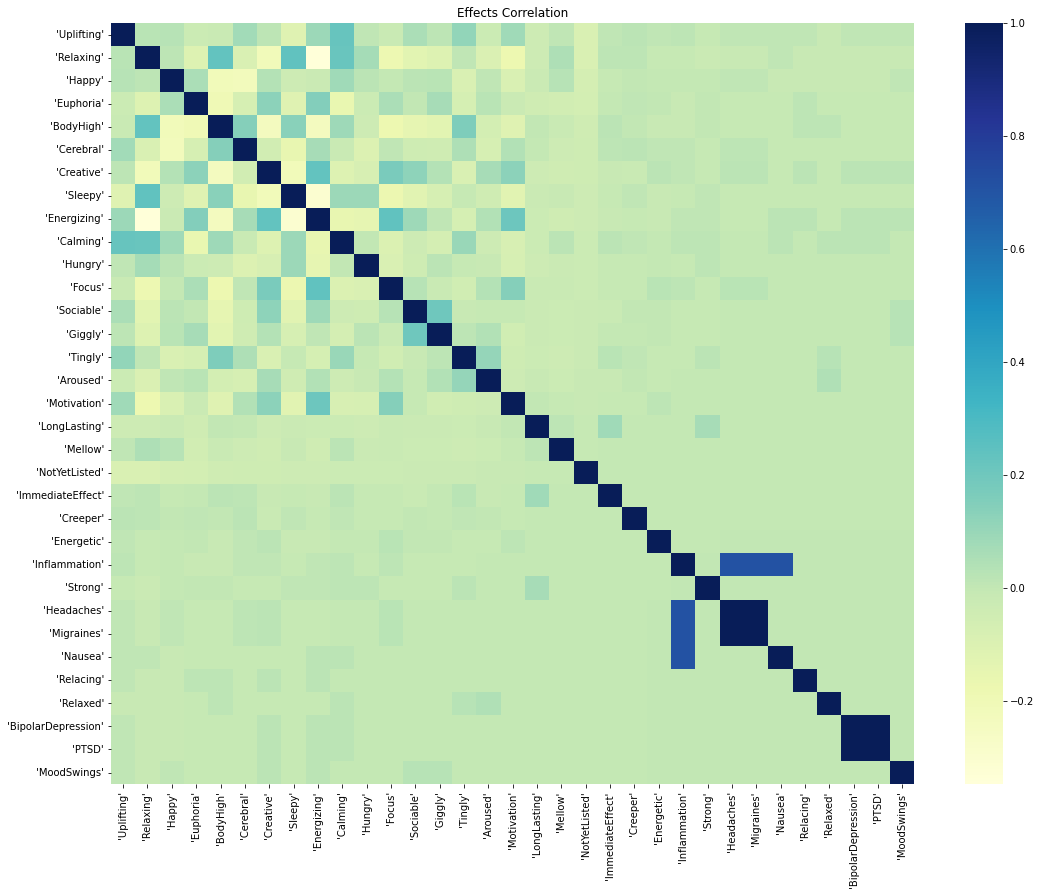

In [56]:
fig, ax = plt.subplots(figsize = (18,14))

dataplot = sns.heatmap(fruits_bool.corr(), cmap = "YlGnBu", annot = False)
ax.set_title("Effects Correlation")
plt.show()

In [57]:
def clean_list(list_):
    #list_ = list_.replace(', ', '","')
    list_ = list_.replace('["', '[')
    list_ = list_.replace('"]', ']')
    list_ = list_.replace('[""', '["')
    list_ = list_.replace(' ', '')

    return list_

In [58]:
strains['aromas'] = strains['aromas'].apply(clean_list)


#strains.convert_dtypes(infer_objects= False).dtypes
strains['aromas'] = strains['aromas'].astype(str)
strains['aromas'] = strains['aromas'].apply(eval)

SyntaxError: invalid syntax (<string>, line 1)

/var/folders/fn/x89br4314ms41dw0v78yt6hc0000gn/T/ipykernel_28275/1249790449.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(unique_effects, rotation = 90)


[Text(0, 0, 'Earthy'),
 Text(1, 0, 'Spicy'),
 Text(2, 0, 'Sweet'),
 Text(3, 0, 'Sour'),
 Text(4, 0, 'Citrus'),
 Text(5, 0, 'Herbal'),
 Text(6, 0, 'Fruity'),
 Text(7, 0, 'Pungent'),
 Text(8, 0, 'Pine'),
 Text(9, 0, 'Woody'),
 Text(10, 0, 'Berry'),
 Text(11, 0, 'Diesel'),
 Text(12, 0, 'Lemon'),
 Text(13, 0, 'Skunky'),
 Text(14, 0, 'Flowery'),
 Text(15, 0, 'Dank'),
 Text(16, 0, 'Grape'),
 Text(17, 0, 'Floral'),
 Text(18, 0, 'Nutty'),
 Text(19, 0, 'Tropical'),
 Text(20, 0, 'Blueberry'),
 Text(21, 0, 'Kush'),
 Text(22, 0, 'Chemical'),
 Text(23, 0, 'Vanilla'),
 Text(24, 0, 'Orange'),
 Text(25, 0, 'Peppery'),
 Text(26, 0, 'Pepper'),
 Text(27, 0, 'Cherry'),
 Text(28, 0, 'Coffee'),
 Text(29, 0, 'Hash'),
 Text(30, 0, 'Lime'),
 Text(31, 0, 'Cheese'),
 Text(32, 0, 'Creamy'),
 Text(33, 0, 'Chocolate'),
 Text(34, 0, 'Pineapple'),
 Text(35, 0, 'Lavender'),
 Text(36, 0, 'Strawberry'),
 Text(37, 0, 'Fragrant'),
 Text(38, 0, 'Sage'),
 Text(39, 0, 'Gas'),
 Text(40, 0, 'Menthol'),
 Text(41, 0, 'Mango'),
 

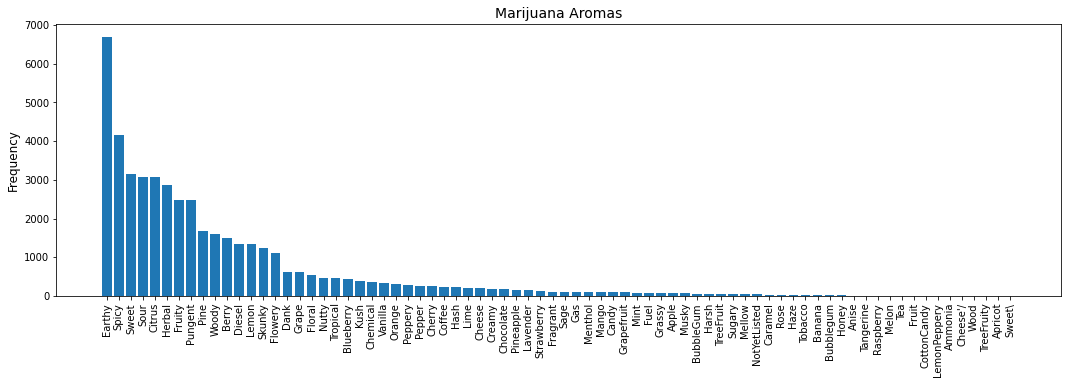

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])


# Get unique items & counts
unique_aromas = to_1D(strains["aromas"]).value_counts().index.tolist()
unique_aromas_counts = to_1D(strains["aromas"]).value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (18,5))
ax.bar(unique_aromas, unique_aromas_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Marijuana Aromas", size = 14)
ax.set_xticklabels(unique_effects, rotation = 90)

In [59]:
aromas_bool = boolean_df(
  item_lists = strains["aromas"],
  unique_items = unique_aromas
)

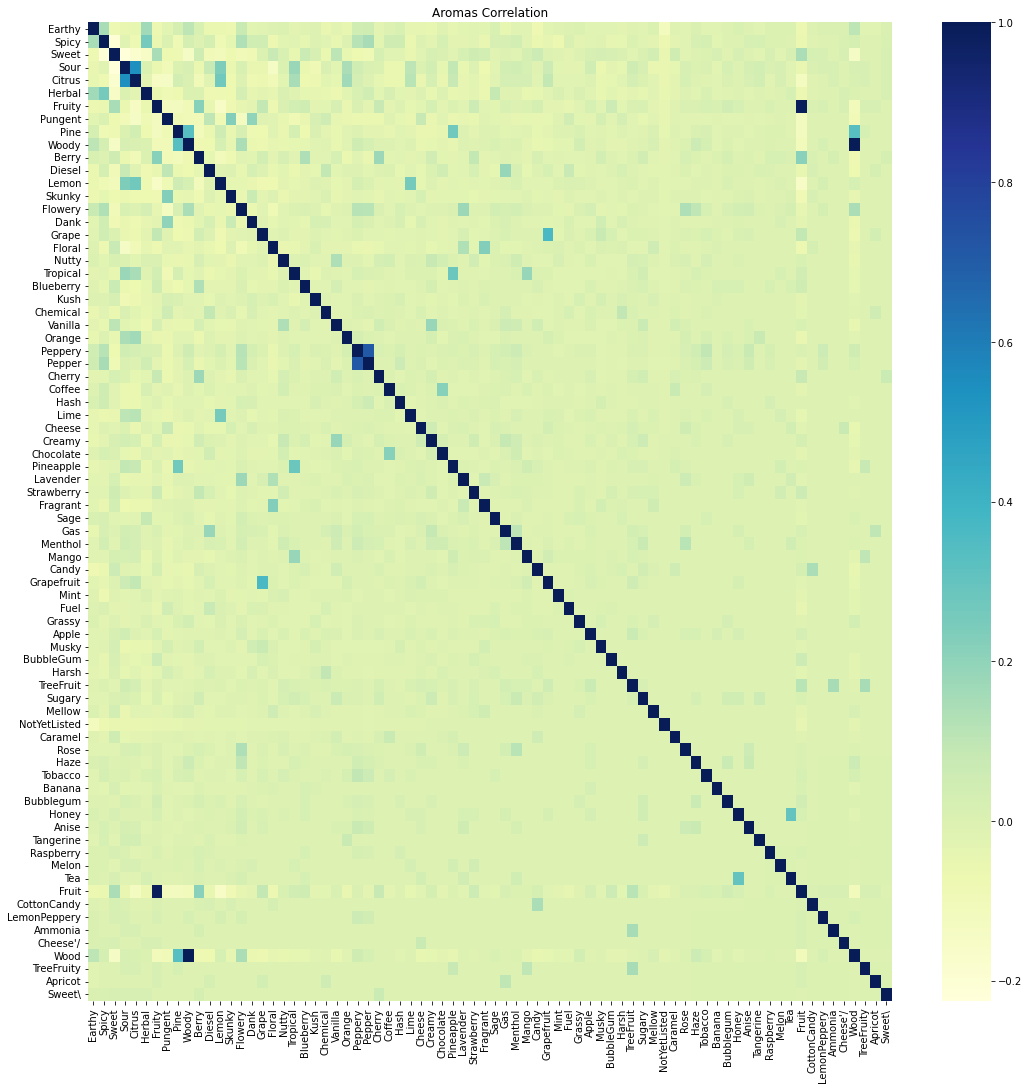

In [66]:
fig, ax = plt.subplots(figsize = (18,18))

dataplot = sns.heatmap(aromas_bool.corr(), cmap = "YlGnBu", annot = False)
ax.set_title("Aromas Correlation")
plt.show()

In [62]:
strains.head(5)

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc
0,S.A.G.E. (Sativa Afghani Genetic Equilibrium) ...,Hybrid,"['Energizing', 'Euphoria', 'Happy', 'Relaxing']","['ADD/ADHD', ' Anxiety', ' Chronic Pain', ' De...","['Earthy','Herbal','Sage','Spicy','Woody']","['Sage', ' Spicy']",4.8,S.A.G.E is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19
1,Cannatonic Marijuana Strain,Hybrid,"['Calming', 'Happy', 'Mellow', 'Relaxing', 'Up...","['Anxiety', ' Chronic Pain', ' Cramps', ' Head...","['Citrus','Earthy','Herbal','Lemon','Sour','Sp...","['Citrus', ' Herbal', ' Sour', ' Spicy', ' Swe...",4.7,Cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07
2,Blue Dream Marijuana Strain,Sativa Dominant Hybrid,"['Creative', 'Energizing', 'Euphoria', 'Happy']","['ADD/ADHD', ' Anxiety', ' Autism', ' Bipolar ...","['Earthy','Fruity','Sweet','Vanilla']","['Berry', ' Blueberry', ' Fruity', ' Herbal', ...",4.5,Blue Dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17
3,Goji OG Marijuana Strain,Sativa Dominant Hybrid,"['Creative', 'Energizing', 'Euphoria', 'Happy'...","['Chronic Pain', ' Depression', ' Gastrointest...","['Cherry','Pungent','Sweet']","['Berry', ' Cherry', ' Strawberry', ' Sweet', ...",4.5,"Named after the bright red Himalayan berry, th...",301.0,0.8,0.2,0.01,0.00,0.22
4,Green Love Potion Marijuana Strain,Indica Dominant Hybrid,"['Aroused', 'Happy', 'Relaxing', 'Sleepy']","['Anxiety', ' Chronic Pain', ' Cramps', ' Depr...","['Earthy','Floral','Lavender','Pungent','Sweet']","['Chemical', ' Herbal', ' Lavender', ' Menthol...",4.5,"Being an indica dominant hybrid strain, Green ...",60.0,0.8,0.2,0.00,0.00,0.11


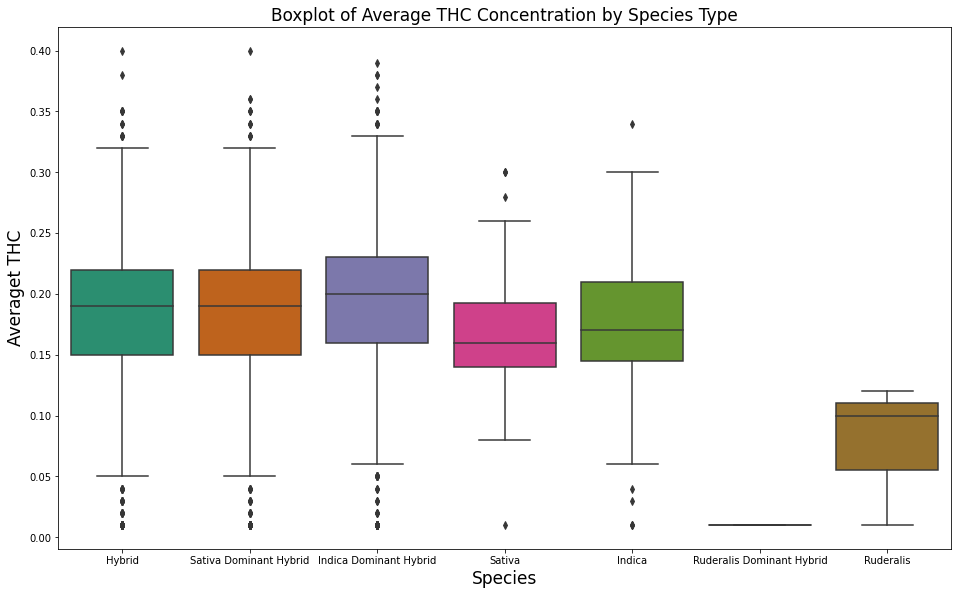

In [65]:
plt.figure(figsize=(16,10))

k = sns.boxplot(x="strain_type",y="avg_thc",  palette='Dark2',
                data=strains[strains["avg_thc"] > 0])
k.set_title("Boxplot of Average THC Concentration by Species Type", 
            fontsize=17)
k.set_xlabel("Species", fontsize=17)
k.set_ylabel("Averaget THC", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show(k)